<a href="https://colab.research.google.com/github/jeonbyeongkug/analysis/blob/master/k_means_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

sns.set_palette("Set2")
x, y = make_blobs(n_samples=100, centers=4, n_features=15, random_state=6, center_box=(0,10))
points = pd.DataFrame(x, y).reset_index(drop=True)
points.columns = ["x_1","x_2","x_3","x_4","x_5","x_6","x_7","x_8","x_9","x_10","x_11","x_12","x_13","x_14","x_15"]
points.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,9.277411,7.780945,3.365510,8.504014,8.909499,0.366581,5.719854,8.281174,8.249845,7.991500,6.033591,2.274682,9.448586,1.370745,1.677573
1,1.913678,6.304739,1.997081,2.619307,8.174549,8.041746,4.010405,0.918567,5.288173,2.710952,8.002483,1.926221,3.049969,9.861731,6.154403
2,7.913954,1.187475,8.386154,1.368168,1.518464,7.419538,7.047690,4.541605,2.710741,6.177957,2.932374,7.322631,5.089517,5.964876,7.548171
3,7.461548,4.893902,8.684629,2.093896,-0.614644,7.378328,6.226734,4.527544,2.485296,6.580032,4.644223,6.749786,3.809312,4.719961,5.922850
4,4.589743,7.244255,-0.359754,3.529383,7.649221,8.407447,4.562077,0.893523,4.659565,1.691874,5.356872,3.108160,3.113464,8.453094,7.277170


In [ ]:
kmeans_point = KMeans(n_clusters=7).fit(points)

In [ ]:
result_by_sklearn.groupby(['cluster']).mean()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
cluster,,,,,,,,,,,,,,,
0,6.946409,-2.894434,6.678041,-8.463432,-8.728035,2.369789,0.533718,-1.858613,-3.492568,2.566817,-0.510032,5.205208,0.735583,2.321014,2.531041
1,4.348138,9.688879,-4.252854,3.413513,2.184809,3.236019,7.999727,-2.777124,-5.035847,-2.104085,4.420946,4.679164,-1.809988,9.941682,-0.429015
2,9.317577,6.772271,-1.696769,6.948031,6.422015,-8.532289,4.774668,5.589633,4.577729,4.167524,0.500489,-8.041193,8.873789,-1.949205,-5.763448
3,-2.255664,4.328146,-8.594214,-1.937842,5.566445,5.340531,-4.074685,-6.199349,-0.756560,-3.226834,4.798259,-6.165810,-3.417971,6.966588,2.404299
4,8.168687,-3.934955,6.327133,-9.187686,-7.190741,1.636109,0.798540,-1.617070,-3.252632,2.470318,-1.314730,4.757080,-0.237982,1.511556,3.290460
5,4.509336,9.518253,-5.237588,3.093918,1.556266,4.585938,9.601790,-3.242815,-4.845934,-2.149116,4.911645,4.302383,-1.779691,9.676472,-0.926540
6,10.396163,6.194810,-1.715586,7.668545,6.225454,-9.199650,3.885045,6.262362,4.726213,4.420902,1.295016,-7.626657,9.580813,-2.625672,-5.089647


In [ ]:
def cluster_compare(df,cluster):
  result_by_sklearn = df.copy()
  result_by_sklearn["cluster"] = cluster.labels_
  result_by_sklearn.head()
  temp = result_by_sklearn.groupby(['cluster']).mean()
  cluster_mean = temp.transpose()
  mean_table = cluster_mean.div(cluster_mean.max(axis=1),axis=0)
  plt.figure(figsize = (20,25))
  annot_kws={'fontsize':12}
  sns.heatmap(mean_table,
              annot = True,
              fmt='.3f',
              linewidths=0.1,
              annot_kws=annot_kws,
              cmap='RdYlBu_r')
  plt.title('클러스터 mean table', fontsize =13)
  return plt.show()
  # 클러스터 단위로 변수가 평균적으로 몇 정도의 값을 가지고 있는지 판단하는 근거
  # ex) 클러스터 '1'은 x_1변수가 평균적으로 3정도의 값을 가지고 있고, 클러스터 '2'는 평균적으로 5를 가지고 있으면 클러스터 별로 1은 3의 성향이 크고, 2는 5의 성향이 짙다.
  # 때에 따라 최빈값, 중앙값 등으로 해도됨

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_te

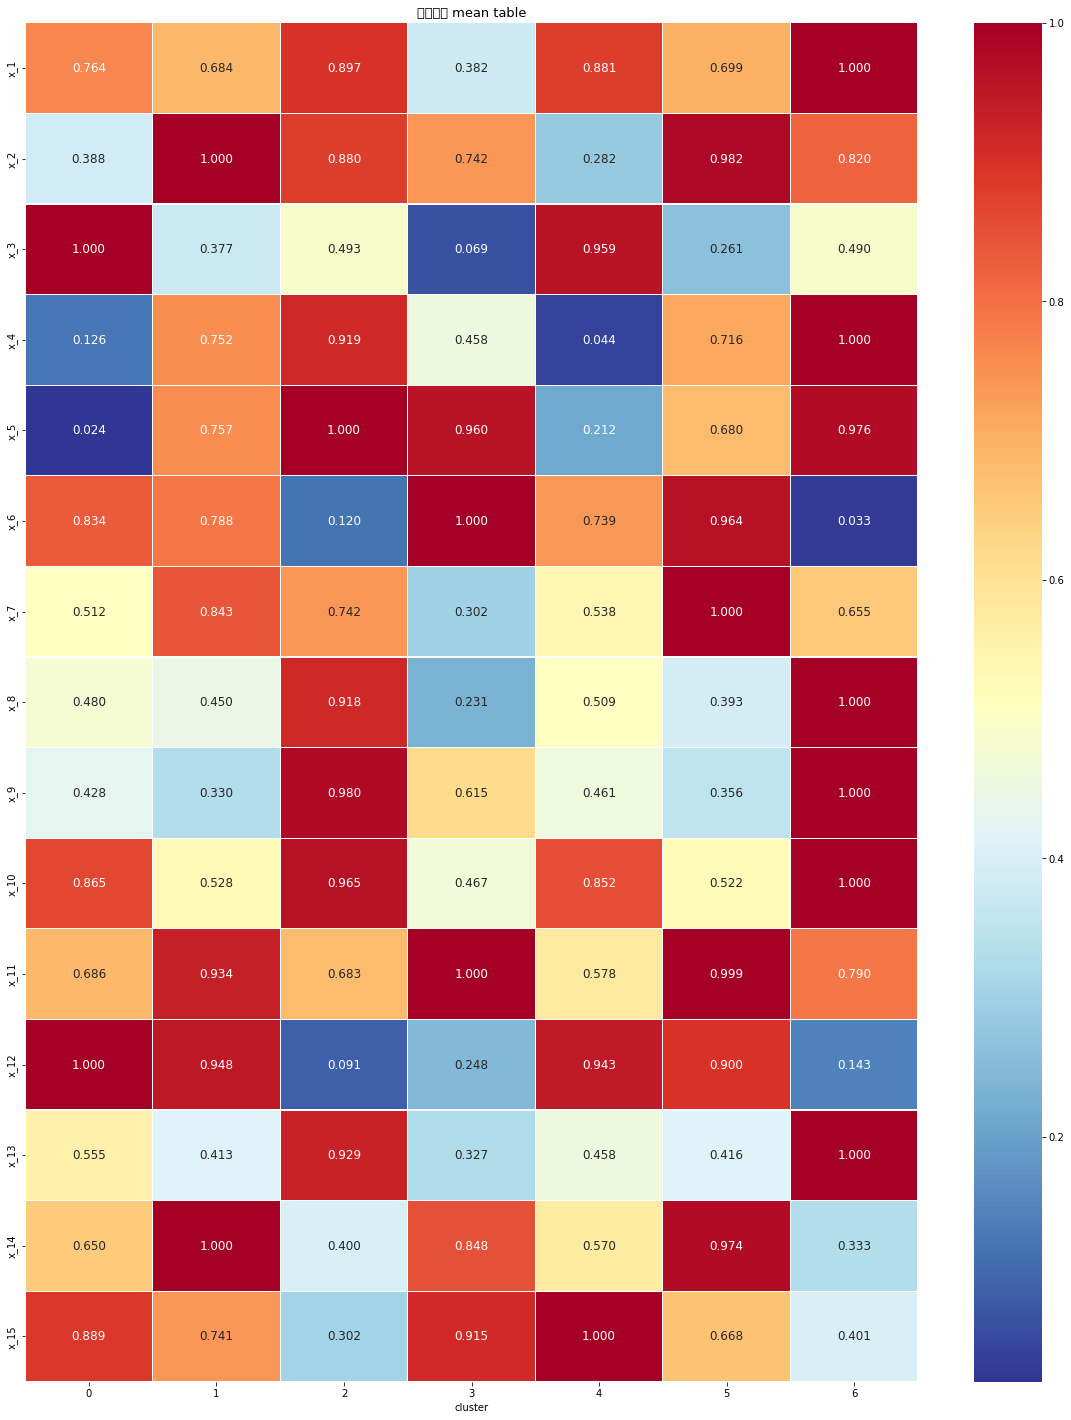

In [ ]:
cluster_compare(points,kmeans_point)

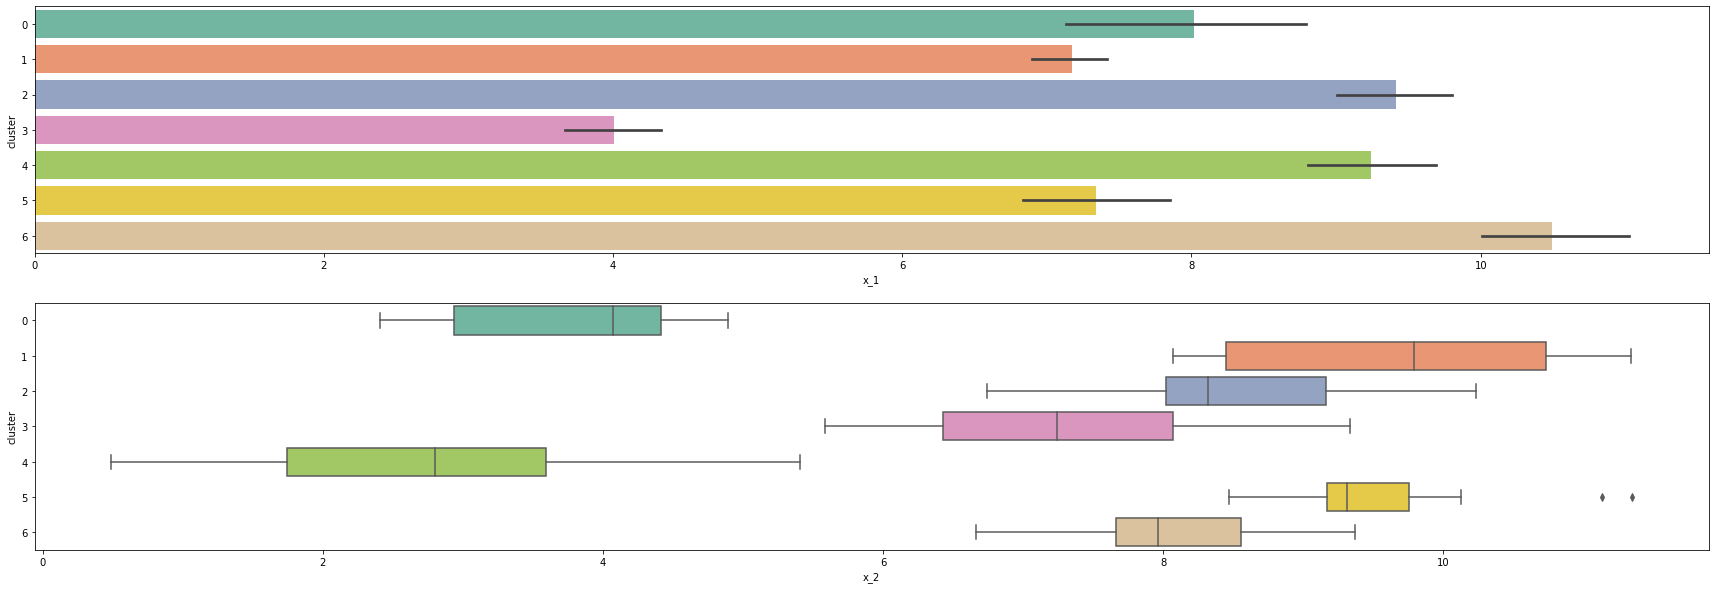

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(30,10)
sns.barplot(data=points, y=result_by_sklearn['cluster'], x='x_1',orient='h',ax=axes[0])
sns.boxplot(data=points, y=result_by_sklearn['cluster'], x='x_2',orient='h',ax=axes[1])

# 변수 단위로 클러스터의 값의 분포 확인 

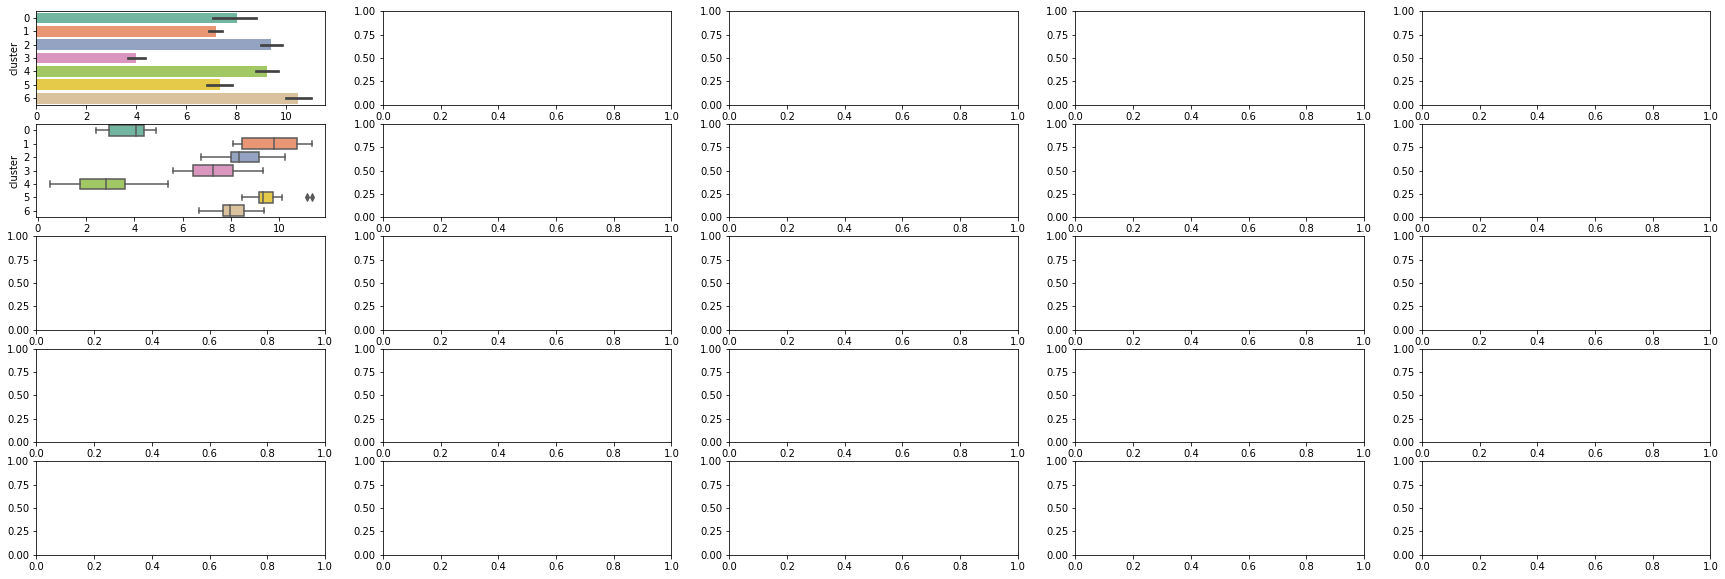

In [ ]:
# for i in range(0,10):
figure, axes = plt.subplots(nrows=5, ncols=5)
figure.set_size_inches(30,10)
sns.barplot(data=points, y=result_by_sklearn['cluster'], x='x_1',orient='h',ax=axes[0,0])
sns.boxplot(data=points, y=result_by_sklearn['cluster'], x='x_2',orient='h',ax=axes[1,0])





# plt.subplot(1,1,1)
# plt.bar(x = points.iloc[:,1], y = result_by_sklearn['cluster'])

# # for m in range(0,2):
# #   for n in range(0,2):
# #     sns.barplot(ax=axes[m,n], data = points, x=points.iloc[:,i], y = result_by_sklearn['cluster'], orient='h')

# # figure, axes = plt.subplots(5,5, figsize=(30,10))
# # sns.barplot(ax=axes[4,0], data = points, x=points.iloc[:,5], y = result_by_sklearn['cluster'], orient='h')


# # sns.barplot(data=points, y=result_by_sklearn['cluster'], x='x_1',orient='h',ax=ax1)
# # sns.barplot(data=points, y=result_by_sklearn['cluster'], x='x_2',orient='h',ax=ax2)
# # sns.barplot(data=points, y=result_by_sklearn['cluster'], x='x_3',orient='h',ax=ax3)
# # sns.barplot(data=points, y=result_by_sklearn['cluster'], x='x_4',orient='h',ax=ax4)

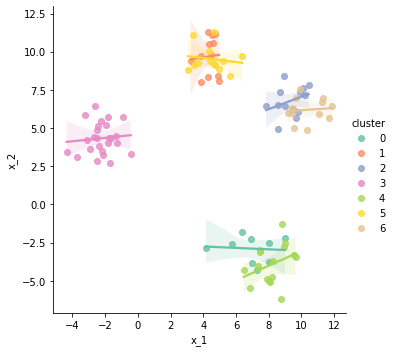

In [ ]:
# 변수 단위 군집 확인
sns.lmplot(x = 'x_1', y = 'x_2', hue='cluster', data = result_by_sklearn, fit_reg=False)

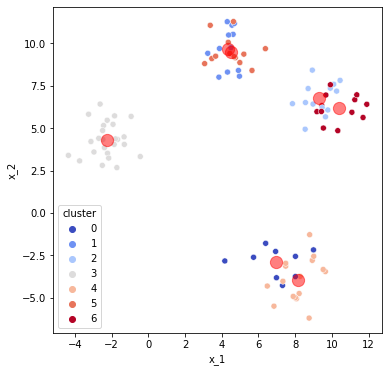

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x='x_1', y='x_2', data=result_by_sklearn, hue='cluster',palette='coolwarm')
plt.scatter(kmeans_point.cluster_centers_[:, 0], kmeans_point.cluster_centers_[:, 1], c='red', alpha=0.5, s=150)

In [ ]:
# 거리 계산
from scipy.spatial.distance import pdist, squrefrom

distance = pdist(data.values, metric = 'euclidean') ** 2
